In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
np.random.seed(2)

In [4]:
X = 2*np.random.rand(1,200)-1 #make between -1 and 1



We are going to approximate $y = \sin(3x)$

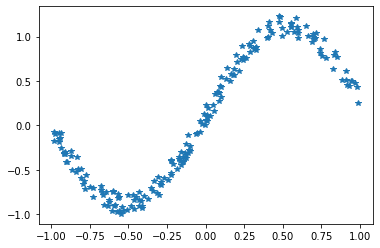

In [15]:
Y = np.sin(3*X) + 0.25*np.random.rand(1,200)

plt.plot(X.T, Y.T,'*')

In [17]:
np.random.seed(3)
W = np.random.rand(1,X.shape[0])
b = np.zeros((1,1))

Start with a value for the learning rate $\alpha$

In [21]:
b

array([[0.]])

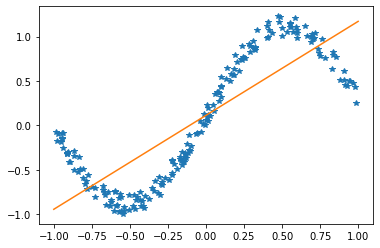

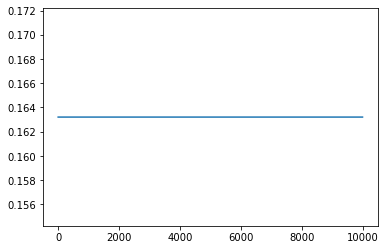

In [33]:
alpha = 0.01
history = []

for step in range(10000):
    
    Z = np.dot(W,X) + b

    # Chain Rule
    dZ = (2/X.shape[1])*(Z - Y)
    dW = np.dot(dZ,X.T)
    db = np.sum(dZ, axis=1, keepdims=True)

    W -= alpha * dW
    b -= alpha * db
    
    history.append(np.mean((Z-Y)**2))

X_grid = np.linspace(-1,1,20).reshape(1,20)
Y_grid = np.dot(W, X_grid) + b

plt.plot(X.T, Y.T, '*')
plt.plot(X_grid.T, Y_grid.T)

plt.figure()
plt.plot(history)

### Neural Network

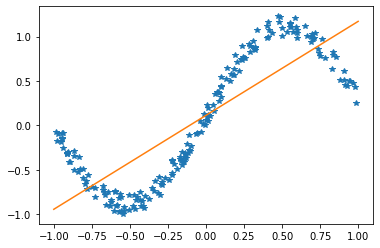

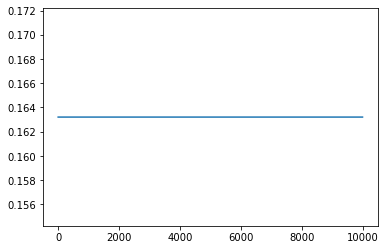

In [ ]:
np.random.seed(3)
n1 = 20 # hockey sticks (numero de neuronas)

W1 = np.random.rand(n1,X.shape[0])
b1 = np.zeros((n1,1))

W2 = np.random.rand(1,n1)
b2 = np.zeros((1,1))

alpha = 0.01
history = []

for step in range(10000):
    # Backpropagation
    Z1 = np.dot(W1,X) + b1
    H1 = Z1 * (Z1>0) #ReLU
    Z2 = np.dot(W2, H1) + b2

    # Chain Rule
        
    dZ2 = (2/X.shape[1])*(Z2 - Y)
    dW2 = np.dot(dZ2, H1.T)
    db2 = np.sum(dZ2, axis=1, keepdims=True)
    dH1 = np.dot(W2.t, dZ2)

    dZ1 = (2/X.shape[1])*(Z2 - Y)
    dW1 = np.dot(dZ2, H1.T)
    db1 = np.sum(dZ2, axis=1, keepdims=True)
    
    W1 -= alpha * dW1
    b1 -= alpha * db1
    W2 -= alpha * dW2
    b2 -= alpha * db2

    history.append(np.mean((Z2-Y)**2))

X_grid = np.linspace(-1,1,20).reshape(1,20)
## AQUI VA Z2 OJO

plt.plot(X.T, Y.T, '*')
plt.plot(X_grid.T, Y_grid.T)

plt.figure()
plt.plot(history)

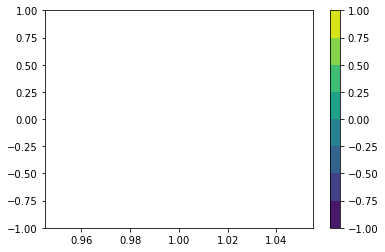

In [40]:
np.random.seed(4)

X = 2*np.random.rand(2,1000)-1
Y = np.sin(10*np.linalg.norm(X,axis=0, keepdims=True)) + 0.25*np.random.randn(1,1000)

X0,X1 = np.meshgrid(np.linspace(1,1,25), np.linspace(-1,1,25))
X_grid = np.vstack([X0.ravel(),X1.ravel()])
Y_sin = np.sin(10*np.linalg.norm(X_grid,axis=0, keepdims=True)) #+ 0.25*np.random.randn(1,1000)

plt.contourf(X0,X1, Y_sin.reshape(X0.shape))
plt.colorbar()

LASSO REG: $L_1 = \sum_{j=1}^p |w_j|$

RIDGE REG: $L_2 = \sum_{j=1}^p w_j^2$